In [1]:
import os
import sys
import random

import numpy as np
import pandas as pd

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D, Conv1D, Embedding, LSTM, MaxPooling1D
from tensorflow.keras.initializers import Constant

from sklearn.preprocessing import LabelEncoder

In [2]:
def get_data2(filename):
    with open(filename) as f:
        contents = f.read()
    sents,labels,intents = [],[],[]
    for line in contents.strip().split('\n'):
        words,labs = [i.split(' ') for i in line.split('\t')]
        sents.append(words[1:-1])
        labels.append(labs[1:-1])
        intents.append(labs[-1])
    return np.array(sents, dtype=object), np.array(labels, dtype=object), np.array(intents, dtype=object)

In [3]:
sents, labels, intents = get_data2("./data/atis.train.w-intent.iob")

In [4]:
train_sentences = [" ".join(i) for i in sents]

train_sentences[13]

'what is the cheapest flight from boston to bwi'

In [5]:
train_texts = train_sentences
train_labels = intents.tolist()

In [6]:
for text, label in zip(train_texts[:10], train_labels[:10]):
    print(f"{text} : {label}")

i want to fly from boston at 838 am and arrive in denver at 1110 in the morning : atis_flight
what flights are available from pittsburgh to baltimore on thursday morning : atis_flight
what is the arrival time in san francisco for the 755 am flight leaving washington : atis_flight_time
cheapest airfare from tacoma to orlando : atis_airfare
round trip fares from pittsburgh to philadelphia under 1000 dollars : atis_airfare
i need a flight tomorrow from columbus to minneapolis : atis_flight
what kind of aircraft is used on a flight from cleveland to dallas : atis_aircraft
show me the flights from pittsburgh to los angeles on thursday : atis_flight
all flights from boston to washington : atis_flight
what kind of ground transportation is available in denver : atis_ground_service


In [7]:
set(train_labels)

{'atis_abbreviation',
 'atis_aircraft',
 'atis_aircraft#atis_flight#atis_flight_no',
 'atis_airfare',
 'atis_airfare#atis_flight_time',
 'atis_airline',
 'atis_airline#atis_flight_no',
 'atis_airport',
 'atis_capacity',
 'atis_cheapest',
 'atis_city',
 'atis_distance',
 'atis_flight',
 'atis_flight#atis_airfare',
 'atis_flight_no',
 'atis_flight_time',
 'atis_ground_fare',
 'atis_ground_service',
 'atis_ground_service#atis_ground_fare',
 'atis_meal',
 'atis_quantity',
 'atis_restriction'}

In [8]:
len(set(train_labels))

22

In [9]:
[1,2,3,4,5][::-1]

[5, 4, 3, 2, 1]

In [10]:
[1,2,3,4,5].pop(2)

3

In [11]:
values = []

# keep track of intent with class # id in it
for i in range(len(train_labels)):
    if "#" in train_labels[i]:
        values.append(i)
   
     
for i in values[::-1]:
    train_labels.pop(i)
    train_texts.pop(i)

In [12]:
len(set(train_labels))

17

In [13]:
values

[570,
 602,
 719,
 859,
 1325,
 1769,
 2019,
 2030,
 2342,
 2693,
 2811,
 2874,
 2954,
 3155,
 3266,
 3336,
 3654,
 3746,
 3878,
 3971,
 4207,
 4373,
 4443,
 4612,
 4814,
 4923]

In [14]:
print("Train sentence: ")
print(len(train_texts))

print("Train labels: ")
print(len(set(train_labels)))

Train sentence: 
4952
Train labels: 
17


In [15]:
def get_data(filename):
    df = pd.read_csv(filename,delim_whitespace=True,names=['word','label'])
    beg_indices = list(df[df['word'] == 'BOS'].index)+[df.shape[0]]
    sents,labels,intents = [],[],[]
    for i in range(len(beg_indices[:-1])):
        sents.append(df[beg_indices[i]+1:beg_indices[i+1]-1]['word'].values)
        labels.append(df[beg_indices[i]+1:beg_indices[i+1]-1]['label'].values)
        intents.append(df.loc[beg_indices[i+1]-1]['label'])    
    return np.array(sents, dtype=object), np.array(labels, dtype=object), np.array(intents, dtype=object)

In [16]:
sents, labels, intents = get_data("./data/atis.test.w-intent.iob")

C:\Users\acer\AppData\Local\Temp\ipykernel_1296\3993574036.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(filename,delim_whitespace=True,names=['word','label'])


In [17]:
test_sentences = [" ".join(sent) for sent in sents]

In [18]:
test_texts = test_sentences
test_labels = intents.tolist()

In [19]:
new_labels = set(test_labels) - set(train_labels)

new_labels

{'atis_airfare#atis_flight',
 'atis_day_name',
 'atis_flight#atis_airfare',
 'atis_flight#atis_airline',
 'atis_flight_no#atis_airline'}

In [20]:
values = []

for i in range(len(test_labels)):
    if "#" in test_labels[i]:
        values.append(i)
        
    elif test_labels[i] in new_labels:
        print(test_labels[i])
        values.append(i)

atis_day_name
atis_day_name


In [21]:
set(test_labels).intersection(set(train_labels))

{'atis_abbreviation',
 'atis_aircraft',
 'atis_airfare',
 'atis_airline',
 'atis_airport',
 'atis_capacity',
 'atis_city',
 'atis_distance',
 'atis_flight',
 'atis_flight_no',
 'atis_flight_time',
 'atis_ground_fare',
 'atis_ground_service',
 'atis_meal',
 'atis_quantity'}

In [22]:
len(set(test_labels))

20

In [23]:
values

[12,
 34,
 36,
 206,
 207,
 208,
 213,
 229,
 405,
 406,
 407,
 492,
 497,
 498,
 499,
 604,
 642]

In [24]:
for i in values[::-1]:
    test_labels.pop(i)
    test_texts.pop(i)

In [25]:
array = [10,12,12,11,34,45,756,8,56,786]
v = [1,2,3,0,4,5,9]

for i in v[::-1]:
    print(f"removing {i}")
    removed = array.pop(i)
    print(f"removed {removed}")

removing 9
removed 786
removing 5
removed 45
removing 4
removed 34
removing 0
removed 10
removing 3
removed 756
removing 2
removed 11
removing 1
removed 12


In [26]:
# array = [10,12,12,11,34,45,756,8,56,786]
# v = [1,2,3,0,4,5,9]

# for i in v: # might occur index out of range so always reverse and pop
#     print(f"removing {i}")
#     removed = array.pop(i)
#     print(f"removed {removed}")

In [27]:
print(f"Number of test sentences: {len(test_texts)}")

Number of test sentences: 876


In [28]:
print(f"Number of test labels: {len(set(test_labels))}")

Number of test labels: 15


In [29]:
only_in_test = set(test_labels) - set(train_labels)

In [30]:
only_in_train = set(train_labels) - set(test_labels)

In [31]:
print(f"The intent only in train set {only_in_train}")

The intent only in train set {'atis_restriction', 'atis_cheapest'}


In [32]:
print(f"The intent only in test set {only_in_test}")

The intent only in test set set()


In [33]:
MAX_SEQUENCE_LENGTH = 300
MAX_NUM_WORDS = 20000
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.3

In [34]:
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(train_texts)
train_sequences = tokenizer.texts_to_sequences(train_texts)
word_index = tokenizer.word_index
print(f"Found {len(word_index)} unique tokens.")

Found 897 unique tokens.


In [35]:
test_sequences = tokenizer.texts_to_sequences(test_texts)

In [36]:
label_encoder = LabelEncoder()
label_encoder.fit_transform(train_labels)

train_labels = label_encoder.transform(train_labels)
test_labels = label_encoder.transform(test_labels)

In [37]:
train_labels.shape, test_labels.shape

((4952,), (876,))

In [38]:
train_labels[:10], test_labels[:10]

(array([ 9,  9, 11,  2,  2,  9,  1,  9,  9, 13]),
 array([9, 2, 9, 9, 9, 9, 9, 9, 9, 9]))

In [39]:
train_sequences[:10]

[[18, 70, 1, 38, 2, 9, 67, 402, 86, 16, 79, 15, 12, 67, 530, 15, 4, 35],
 [6, 3, 26, 58, 2, 19, 1, 22, 5, 77, 35],
 [6, 20, 4, 403, 180, 15, 11, 14, 37, 4, 531, 86, 8, 33, 32],
 [52, 274, 2, 181, 1, 119],
 [55, 49, 71, 2, 19, 1, 24, 319, 227, 169],
 [18, 54, 13, 8, 134, 2, 213, 1, 170],
 [6, 219, 29, 135, 20, 208, 5, 13, 8, 2, 136, 1, 21],
 [10, 7, 4, 3, 2, 19, 1, 138, 139, 5, 77],
 [23, 3, 2, 9, 1, 32],
 [6, 219, 29, 46, 51, 20, 58, 15, 12]]

In [40]:
train_valid_data = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH)
test_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [41]:
to_categorical([1,2,3])

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [42]:
train_valid_labels = to_categorical(train_labels)

train_valid_labels[:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0.]])

In [43]:
train_valid_data[:10]

array([[  0,   0,   0, ...,  15,   4,  35],
       [  0,   0,   0, ...,   5,  77,  35],
       [  0,   0,   0, ...,   8,  33,  32],
       ...,
       [  0,   0,   0, ..., 139,   5,  77],
       [  0,   0,   0, ...,   9,   1,  32],
       [  0,   0,   0, ...,  58,  15,  12]])

In [44]:
test_labels = to_categorical(np.asarray(test_labels), num_classes=train_valid_labels.shape[1])

test_labels.shape

(876, 17)

In [45]:
print(f"Training data: {train_valid_data.shape}")

Training data: (4952, 300)


In [46]:
print(f"Testing data shape: {test_data.shape}")

Testing data shape: (876, 300)


In [47]:
print(f"Train labels: {train_valid_labels.shape}")

Train labels: (4952, 17)


In [48]:
print(f"Test labels: {test_labels.shape}")

Test labels: (876, 17)


In [49]:
# splitting the data

indices = np.arange(train_valid_data.shape[0])
np.random.shuffle(indices)

train_valid_data_shuffled = train_valid_data[indices]
train_valid_labels_shuffled = train_valid_labels[indices]

num_validation_samples = int(VALIDATION_SPLIT * train_valid_data.shape[0])

x_train = train_valid_data_shuffled[:-num_validation_samples]
y_train = train_valid_labels_shuffled[:-num_validation_samples]

x_val = train_valid_data_shuffled[-num_validation_samples:]
y_val = train_valid_labels_shuffled[-num_validation_samples:]

In [50]:
array = [1,2,3,4,5,6,7,8,9,10,11]
v = 3
x = array[:-v]
y = array[-v:]

x, y

([1, 2, 3, 4, 5, 6, 7, 8], [9, 10, 11])

In [51]:
# modeling

num_words = len(word_index) + 1

print(f"Number of words: {num_words} and max : {MAX_NUM_WORDS}")

Number of words: 898 and max : 20000


## Embedding

In [52]:
embedding_layer = Embedding(
    num_words,
    EMBEDDING_DIM
)

# input dim : 898 one hot encoded
# output dim: 100 dim embedding
# input length: 300 words input sequence

embedding_layer.get_config()

{'name': 'embedding',
 'trainable': True,
 'dtype': 'float32',
 'input_dim': 898,
 'output_dim': 100,
 'embeddings_initializer': {'module': 'keras.initializers',
  'class_name': 'RandomUniform',
  'config': {'minval': -0.05, 'maxval': 0.05, 'seed': None},
  'registered_name': None},
 'embeddings_regularizer': None,
 'activity_regularizer': None,
 'embeddings_constraint': None,
 'mask_zero': False}

### MODEL1: CNN

In [53]:
cnn_model = Sequential()

cnn_model.add(embedding_layer)
cnn_model.add(Conv1D(128, 5, activation="relu"))
cnn_model.add(MaxPooling1D(5))
cnn_model.add(Conv1D(128, 5, activation="relu"))
cnn_model.add(MaxPooling1D(5))
cnn_model.add(Conv1D(128, 5, activation="relu"))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(128, activation="relu"))
cnn_model.add(Dense(len(set(train_labels)), activation="softmax"))

In [54]:
cnn_model.compile(
    loss="categorical_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"]
)

In [55]:
model_1_history = cnn_model.fit(
    x_train,
    y_train,
    batch_size=128,
    epochs=20,
    validation_data=(x_val, y_val)
)

Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.6355 - loss: 1.8495 - val_accuracy: 0.7441 - val_loss: 1.1567
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.7398 - loss: 1.1694 - val_accuracy: 0.7441 - val_loss: 1.1094
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.7334 - loss: 1.0821 - val_accuracy: 0.7441 - val_loss: 0.9893
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.7554 - loss: 0.8636 - val_accuracy: 0.7212 - val_loss: 1.0965
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.7718 - loss: 0.8043 - val_accuracy: 0.7872 - val_loss: 0.6967
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.8068 - loss: 0.6710 - val_accuracy: 0.7960 - val_loss: 0.6937
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.8255 - loss: 0.6116 - val_accuracy: 0.3845 - val_loss: 1.5508
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.7997 - loss: 0.6416 - val_accuracy: 0.8774 - v

In [56]:
score, acc = cnn_model.evaluate(test_data, test_labels)

print(f"Test score: {score}")
print(f"Accuracy: {acc}")

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7535 - loss: 0.8265
Test score: 0.9316849112510681
Accuracy: 0.7397260069847107


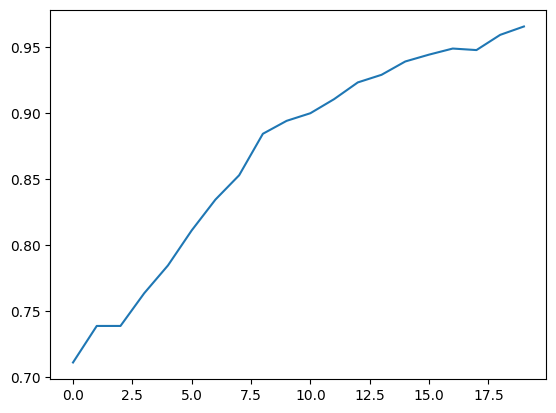

In [57]:
import matplotlib.pyplot as plt

plt.plot(model_1_history.history["accuracy"], label="train accuracy")


In [61]:
test_data[0].shape

(300,)

In [66]:
reshaped = test_data[0].reshape(1, 300)

In [68]:
reshaped.shape

(1, 300)

In [69]:
logits = cnn_model.predict(reshaped)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [70]:
logits.shape

(1, 17)

In [81]:
logits_sample = [[0, 1, 2, 3, 2, 1, 0], [9, 8, 1, 2, 8, 9, 0]]
logits_sample = np.asarray(logits_sample)

logits_sample.argmax(axis=-1)

array([3, 0], dtype=int64)

In [86]:
np.argmax([[9,2,3],[4,5,6]], axis=0)

array([0, 1, 1], dtype=int64)

In [92]:
np.argmax([[9,2,3],[4,5,6]], axis=1)

array([0, 2], dtype=int64)

In [71]:
logits.argmax(axis=1)

array([9], dtype=int64)

In [93]:
logits.shape

(1, 17)

In [94]:
pred_label = logits.argmax(axis=1)

In [100]:
true_label = test_labels[0].argmax()

In [103]:
pred_label.tolist()[0], true_label

(9, 9)

In [105]:
classes = label_encoder.classes_

In [107]:
print(f"{test_texts[0]}: {classes[pred_label.tolist()[0]]}")

i would like to find a flight from charlotte to las vegas that makes a stop in st. louis: atis_flight


In [111]:
def predict_intent(text):
    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
    tensor = np.asarray(padded).reshape(1, 300)
    logits = cnn_model.predict(tensor)
    pred_label = logits.argmax(axis=-1)
    pred_class = classes[pred_label.tolist()[0]]
    
    print(f"{text}:\n => {pred_class}")

In [112]:
predict_intent("I want to fly from Boston to San Francisco")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
I want to fly from Boston to San Francisco:
 => atis_flight


In [113]:
predict_intent("What is the ticket price from New York to Antartica")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
What is the ticket price from New York to Antartica:
 => atis_airfare


In [121]:
predict_intent("service available from new york to boston")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
service available from new york to boston:
 => atis_airline


In [131]:
predict_intent("services available")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
services available:
 => atis_abbreviation


In [134]:
predict_intent("cheapest airfare")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
cheapest airfare:
 => atis_abbreviation
